In [183]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [184]:
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [192]:
import sys
sys.path.append('..')
from dataset import batcher

In [193]:
INPUT_SHAPE = (224, 224, 3)
BUCKET = False

TFRECORDS_DIR = '../data/lsms_tfrecords/'

In [206]:
# Split dataset
train_batcher = batcher.Batcher(
    image_shape=INPUT_SHAPE, bucket=BUCKET, batch_size=4559, shuffle=False, repeat=1, split="train"
).get_dataset()

val_batcher = batcher.Batcher(
    image_shape=INPUT_SHAPE, bucket=BUCKET, batch_size=1302, shuffle=False, repeat=1, split="val"
).get_dataset()

test_batcher = batcher.Batcher(
    image_shape=INPUT_SHAPE, bucket=BUCKET, batch_size=652, shuffle=False, repeat=1, split="test"
).get_dataset()

splits = {'Train Split': train_batcher, 'Validation Split': val_batcher, 'Test Split': test_batcher}

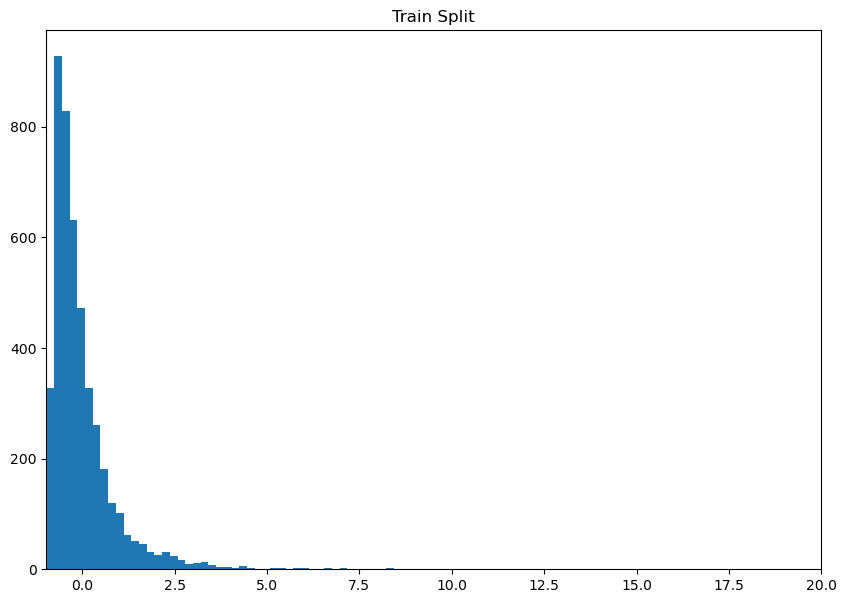

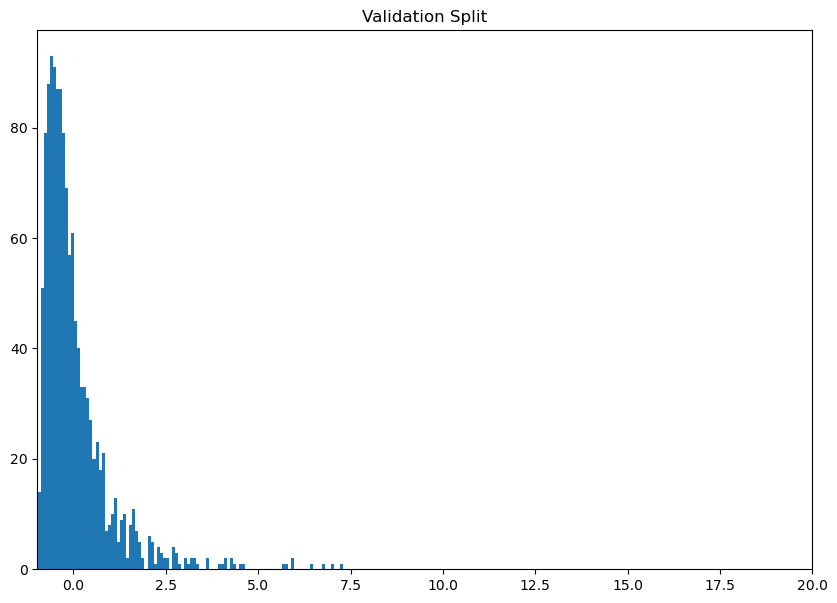

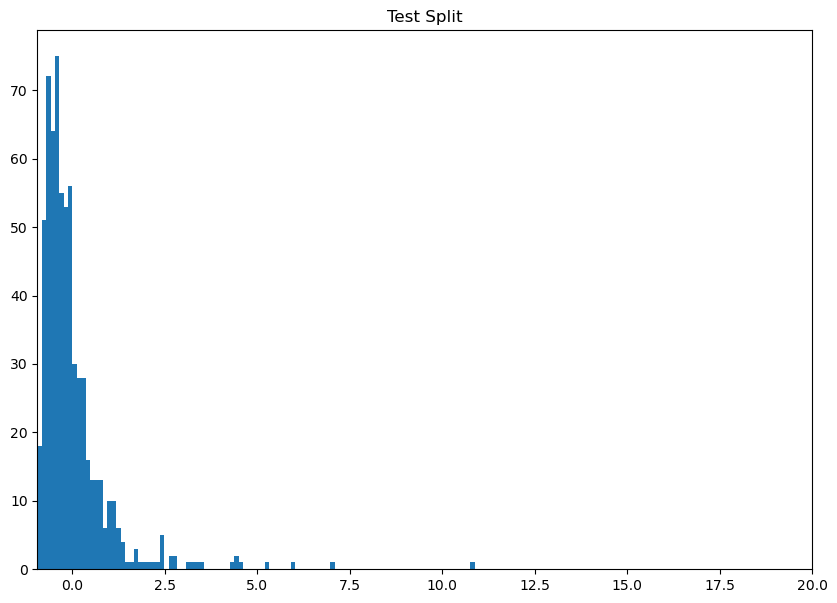

In [188]:
# Consumption histograms
for s_batcher in splits.items():
    consumption = []
    for x, y in s_batcher[1]:
        consumption.append(y)
    consumption = np.squeeze(consumption)
    
    fig, ax = plt.subplots(figsize =(10, 7))
    ax.hist(consumption, bins = 100)
    
    
    plt.title(s_batcher[0])
    plt.xlim([np.min(consumption), 20])
    plt.show()


(652, 224, 224, 3)


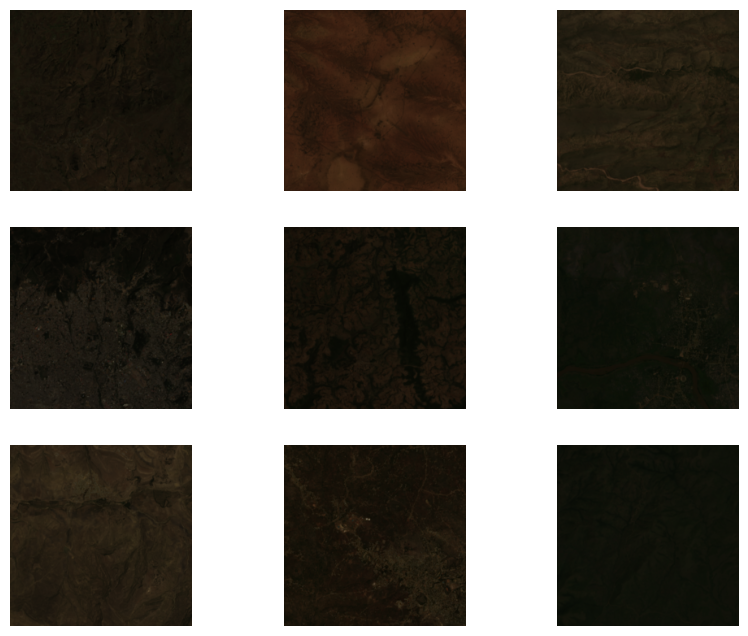

In [208]:
for x, y in test_batcher:
    imgs = x    
    print(np.shape(x))

sample_imgs = imgs[:9]
# print(sample_imgs)
img_per_col = 3
fig, axs = plt.subplots(nrows=3, ncols=img_per_col, sharex=True, sharey=True)

for i, img in enumerate(sample_imgs):
    ax = axs[i // img_per_col, i % img_per_col]
    im = ax.imshow(img, origin='lower', cmap='viridis', vmin=0, vmax=1)
    ax.set_aspect('equal')
    ax.axis('off')
    
fig.set_size_inches(10, 8, forward=True)
plt.show()